In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import os
#for dirname, _, filenames in os.walk('PO4'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))



In [2]:
PlayTennis = pd.read_csv("PlayTennis.csv")
PlayTennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])
PlayTennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [4]:
features_cols=['outlook','temp','humidity','windy']
x=PlayTennis[features_cols]
y=PlayTennis.play
x


,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [5]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)
from sklearn.tree import DecisionTreeClassifier
#classifier=DecisionTreeClassifier(criterion='gini')
classifier=DecisionTreeClassifier(criterion='entropy') # check the documentation for more options https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
classifier

DecisionTreeClassifier(criterion='entropy')

In [7]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
from sklearn.metrics import accuracy_score
test_y_pred=classifier.predict(x_test)
print("Testing Accuracy", accuracy_score(y_test,test_y_pred))

Testing Accuracy 0.75


In [9]:
x_test

,outlook,temp,humidity,windy
12,0,1,1,0
2,0,1,0,0
3,1,2,0,0
13,1,2,0,1


In [10]:
y_test

12    1
2     1
3     1
13    0
Name: play, dtype: int64

In [11]:
classifier.score(x_test,y_test)

0.75

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

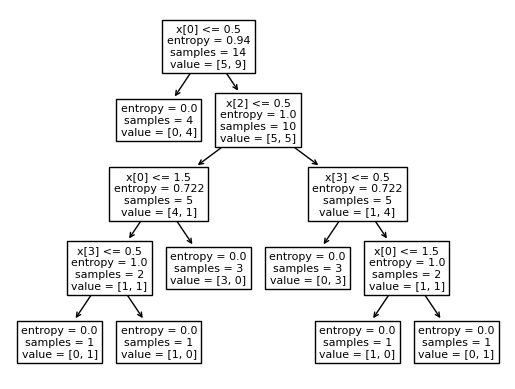

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x, y)
tree.plot_tree(clf)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
clf = RandomForestClassifier(n_estimators=300, bootstrap=True,max_features="sqrt", criterion="gini")
clf


RandomForestClassifier(n_estimators=300)

In [14]:
from sklearn.metrics import accuracy_score
clf = clf.fit(x_train,y_train)
clf.predict(x_train)
test_y_pred= clf.predict(x_test)
print("Testing Accuracy", accuracy_score(y_test,test_y_pred))

Testing Accuracy 0.75
